## Fake News Detection

Import library

In [ ]:
import nltk
import json
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import csv
import numpy as np
import nltk
import seaborn as sb
import warnings

: 

In [ ]:
df=pd.read_csv(r"C:/Users/Lenovo/Desktop/FakeNewsDetectionOnSocialMedia/train1.csv", delimiter='\t', quoting=3, header= None, engine='python')

In [ ]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0,0,0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7,19,3,5,44,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,20,19,2,an interview on CNN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0,3,2,5,1,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3,1,1,3,1,a press release.
7,153.json,half-true,"""I'm the only person on this stage who has wor...",ethics,barack-obama,President,Illinois,democrat,70,71,160,163,9,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0,0,1,0,1,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0,0,0,1,0,an online video


In [ ]:
train = pd.read_csv('train.csv', delimiter='\t', quoting=3, header=None)
test = pd.read_csv('test.csv', delimiter='\t', quoting=3, header=None)
valid = pd.read_csv('valid.csv', delimiter='\t', quoting=3, header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0,0,0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7,19,3,5,44,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,20,19,2,an interview on CNN


In [ ]:
df_raw = pd.concat([train, test, valid], axis=0, sort=False)
df_raw = df_raw.sample(frac=1).reset_index()
df_raw.head(2)

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1708,9804.json,half-true,Says Iowa Republican Senate candidate Joni Ern...,"message-machine-2014,retirement,social-securit...",democratic-senatorial-campaign-committee,NaN,NaN,democrat,1,2,3,1,0,a campaign ad
1,9815,8646.json,half-true,The CBO just said if we cut this (unemployment...,"economy,jobs",david-madland,"Director, American Worker Project",NaN,none,0,0,1,0,0,"a broadcast of CNN's ""Crossfire"""


In [ ]:
df_raw.columns=["index","ID", "label", "statement", "subject", "speaker", "job", "state", "party", "barely_true_cts",
        "false_cts", "half_true_cts", "mostly_true_cts", "pants_on_fire_cts", "context"]

In [ ]:
df_raw.head(5)

,index,ID,label,statement,subject,speaker,job,state,party,barely_true_cts,false_cts,half_true_cts,mostly_true_cts,pants_on_fire_cts,context
0,1708,9804.json,half-true,Says Iowa Republican Senate candidate Joni Ern...,"message-machine-2014,retirement,social-securit...",democratic-senatorial-campaign-committee,NaN,NaN,democrat,1,2,3,1,0,a campaign ad
1,9815,8646.json,half-true,The CBO just said if we cut this (unemployment...,"economy,jobs",david-madland,"Director, American Worker Project",NaN,none,0,0,1,0,0,"a broadcast of CNN's ""Crossfire"""
2,8899,5357.json,pants-fire,The U.S. Census believes that by 2030 the majo...,"census,immigration,pop-culture",glee,NaN,NaN,none,0,0,0,0,1,an episode on TV
3,5062,9362.json,barely-true,"Walmart employees receive roughly $5,800 in pu...","welfare,workers",ed-schultz,MSNBC television host,NaN,none,3,1,4,1,2,"a segment on ""The Ed Show"""
4,10230,12290.json,mostly-true,"Over the past two years, Florida has cut more ...",taxes,rick-scott,Governor,Florida,republican,28,23,38,34,7,a press release


Text(0.5, 1.0, 'Types & Number of Classes in the dataset')

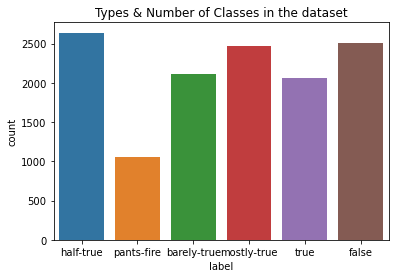

In [ ]:
sns.countplot(x='label',data=df_raw)
plt.title('Types & Number of Classes in the dataset')

# Using CountVectorizer for Extracting features from 'statements'

In [ ]:
# specifying features and labels
x= df_raw['statement']
y=df_raw['label']

In [ ]:
x.head(5)

0    Says Iowa Republican Senate candidate Joni Ern...
1    The CBO just said if we cut this (unemployment...
2    The U.S. Census believes that by 2030 the majo...
3    Walmart employees receive roughly $5,800 in pu...
4    Over the past two years, Florida has cut more ...
Name: statement, dtype: object

In [ ]:
y.head(5)

0      half-true
1      half-true
2     pants-fire
3    barely-true
4    mostly-true
Name: label, dtype: object

In [ ]:
df_raw.shape

(12836, 15)

In [ ]:
# specifying train and test split with ratio of 80:20

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 0, stratify=y)
print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

10268 2568
10268 2568


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [ ]:
df=df_raw.dropna()

In [ ]:
df.head(5)

,index,ID,label,statement,subject,speaker,job,state,party,barely_true_cts,false_cts,half_true_cts,mostly_true_cts,pants_on_fire_cts,context
4,10230,12290.json,mostly-true,"Over the past two years, Florida has cut more ...",taxes,rick-scott,Governor,Florida,republican,28,23,38,34,7,a press release
5,987,11761.json,true,Says Marco Rubio knows full well I voted for h...,"federal-budget,military,voting-record",ted-cruz,Senator,Texas,republican,36,33,15,19,8,a Republican presidential debate in North Char...
6,2812,8688.json,barely-true,The Murray-Ryan deal is the first divided-gove...,"congress,federal-budget",paul-ryan,U.S. Representative,Wisconsin,republican,19,6,16,14,2,a press conference
8,5565,8373.json,half-true,Says her actions as Wisconsin commerce secreta...,"job-accomplishments,jobs",mary-burke,Madison school board member,Wisconsin,democrat,5,5,11,8,3,a video
10,6003,11644.json,barely-true,Ted Cruz tried to ban contraception five times.,"abortion,health-care",hillary-clinton,Presidential candidate,New York,democrat,40,29,69,76,7,a post on her campaign website


In [ ]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.head(5)

,level_0,index,ID,label,statement,subject,speaker,job,state,party,barely_true_cts,false_cts,half_true_cts,mostly_true_cts,pants_on_fire_cts,context
0,4,10230,12290.json,mostly-true,"Over the past two years, Florida has cut more ...",taxes,rick-scott,Governor,Florida,republican,28,23,38,34,7,a press release
1,5,987,11761.json,true,Says Marco Rubio knows full well I voted for h...,"federal-budget,military,voting-record",ted-cruz,Senator,Texas,republican,36,33,15,19,8,a Republican presidential debate in North Char...
2,6,2812,8688.json,barely-true,The Murray-Ryan deal is the first divided-gove...,"congress,federal-budget",paul-ryan,U.S. Representative,Wisconsin,republican,19,6,16,14,2,a press conference
3,8,5565,8373.json,half-true,Says her actions as Wisconsin commerce secreta...,"job-accomplishments,jobs",mary-burke,Madison school board member,Wisconsin,democrat,5,5,11,8,3,a video
4,10,6003,11644.json,barely-true,Ted Cruz tried to ban contraception five times.,"abortion,health-care",hillary-clinton,Presidential candidate,New York,democrat,40,29,69,76,7,a post on her campaign website


# Custom Pre - Processing and Tokenisation of the data

In [ ]:
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
#nltk.download('stopwords')


""" Regular expression for cleaning the statements"""

hashtag_re = re.compile(r"#\w+")
mention_re = re.compile(r"@\w+")
url_re = re.compile(r"(?:https?://)?(?:[-\w]+\.)+[a-zA-Z]{2,9}[-\w/#~:;.?+=&%@~]*")
extras_re = re.compile("[.;:!\'?,\"()\[\]]")
#apos_re = "\'[a-z]*"
#leftover_re = "\S+"

""" Preprocessing the text in the statements"""
def preprocess(text):
    p_text = hashtag_re.sub("[hashtag]",text)
    p_text = mention_re.sub("[mention]",p_text)
    p_text = extras_re.sub("",p_text)
    p_text = url_re.sub("[url]",p_text)
    p_text = ftfy.fix_text(p_text)
    return p_text.lower()

# regular expression for custom tokenisation"
tokenise_re = re.compile(r"(\[[^\]]+\]|[-'\w]+|[^\s\w\[']+)") #([]|words|other non-space)

# defining 3 types of tokenisation

def custom_tokenise(text):
    return tokenise_re.findall(text.lower())

def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    return words


def nltk_twitter_tokenise(text):
    twtok = nltk.tokenize.TweetTokenizer()
    return twtok.tokenize(text.lower())

# stop words list set to english
stopwords_list = stopwords.words('english') # stop word list

""" function for decontracting the statements"""
#def decontracted(phrase):
   # phrase = re.sub(r"won\'t", "will not", phrase)
   # phrase = re.sub(r"can\'t", "can not", phrase)
   # phrase = re.sub(r"n\'t", " not", phrase)
   # phrase = re.sub(r"\'re", " are", phrase)
   # phrase = re.sub(r"\'s", " is", phrase)
   # phrase = re.sub(r"\'d", " would", phrase)
    #phrase = re.sub(r"\'ll", " will", phrase)
    #phrase = re.sub(r"\'t", " not", phrase)
    #phrase = re.sub(r"\'ve", " have", phrase)
   # phrase = re.sub(r"\'m", " am", phrase)
    #return phrase

' function for decontracting the statements'

# Defining custom functions for displaying results of Classification

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
%pip install xgboost
from xgboost import XGBClassifier # need to import xboost calssifer

from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer


# function for results of cross-validation
def print_cv_scores_summary(name, scores):
    print("{}: mean = {:.2f}%, sd = {:.2f}%, min = {:.2f}, max = {:.2f}".format(name, scores.mean()*100, scores.std()*100, scores.min()*100, scores.max()*100))


# fucntion for results of model fitting
def print_scores():
    print("Accuracy: ", accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    
# function for displaying confusion matrix
def confusion_matrix_heatmap(cm, index):
    cmdf = pd.DataFrame(cm, index = index, columns=index)
    dims = (10, 8)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(cmdf, annot=True, cmap="BuPu", center=0, fmt='g')
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')

# function for displaying confusion matrix in percentage terms
def confusion_matrix_percent_heatmap(cm, index):
    cmdf = pd.DataFrame(cm, index = index, columns=index)
    percents = cmdf.div(cmdf.sum(axis=1), axis=0)*100
    dims = (10, 10)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(percents, annot=True, cmap="PiYG", center=0, vmin=0, vmax=100)
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, 25, 50, 75, 100])
    cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
    
#list(df_columns.columns))-list(df_raw['labels'])"coolwarm"'Blues'PiYG'BuPu'

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(x_train) 
count_test = count_vectorizer.transform(x_test)


tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)
print(tfidf_vectorizer.get_feature_names()[-10:])
print(count_vectorizer.get_feature_names()[:10])

['zimmerman', 'zip', 'zippo', 'zombie', 'zombies', 'zone', 'zones', 'zoning', 'zuckerberg', 'zuckerbergs']
['00', '000', '000new', '02', '033', '036', '04', '05', '050', '054th']


In [ ]:
print(df.isnull().sum())

index                0
ID                   0
label                0
statement            0
subject              0
speaker              0
job                  0
state                0
party                0
barely_true_cts      0
false_cts            0
half_true_cts        0
mostly_true_cts      0
pants_on_fire_cts    0
context              0
dtype: int64


In [ ]:
count_FN = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_FN = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

count_FN.head()


,00,000,000new,02,033,036,04,05,050,054th,...,zimmerman,zip,zippo,zombie,zombies,zone,zones,zoning,zuckerberg,zuckerbergs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tfidf_FN.head()

,00,000,000new,02,033,036,04,05,050,054th,...,zimmerman,zip,zippo,zombie,zombies,zone,zones,zoning,zuckerberg,zuckerbergs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
difference = set(count_FN.columns) - set(tfidf_FN.columns)
difference
set()
print(count_FN.equals(tfidf_FN))

False


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474 entries, 4 to 12833
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              8474 non-null   int64 
 1   ID                 8474 non-null   object
 2   label              8474 non-null   object
 3   statement          8474 non-null   object
 4   subject            8474 non-null   object
 5   speaker            8474 non-null   object
 6   job                8474 non-null   object
 7   state              8474 non-null   object
 8   party              8474 non-null   object
 9   barely_true_cts    8474 non-null   int64 
 10  false_cts          8474 non-null   int64 
 11  half_true_cts      8474 non-null   int64 
 12  mostly_true_cts    8474 non-null   int64 
 13  pants_on_fire_cts  8474 non-null   int64 
 14  context            8474 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.0+ MB
None


In [ ]:
print(df.describe())

              index  barely_true_cts    false_cts  half_true_cts  \
count   8474.000000      8474.000000  8474.000000    8474.000000   
mean    4217.388600        15.468728    17.515577      23.973684   
std     3208.603394        21.981039    27.971855      42.129553   
min        0.000000         0.000000     0.000000       0.000000   
25%     1070.000000         0.000000     1.000000       1.000000   
50%     3760.500000         3.000000     4.000000       4.000000   
75%     7062.750000        28.000000    24.000000      31.000000   
max    10268.000000        70.000000   114.000000     160.000000   

       mostly_true_cts  pants_on_fire_cts  
count      8474.000000        8474.000000  
mean         23.143498           5.812367  
std          42.589729          12.328769  
min           0.000000           0.000000  
25%           1.000000           0.000000  
50%           4.000000           1.000000  
75%          33.000000           7.000000  
max         163.000000          61.

# Defining custom functions for displaying results of Classification

In [ ]:
# function for results of cross-validation
def print_cv_scores_summary(name, scores):
    print("{}: mean = {:.2f}%, sd = {:.2f}%, min = {:.2f}, max = {:.2f}".format(name, scores.mean()*100, scores.std()*100, scores.min()*100, scores.max()*100))


# fucntion for results of model fitting
def print_scores():
    print("Accuracy: ", accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    
# function for displaying confusion matrix
def confusion_matrix_heatmap(cm, index):
    cmdf = pd.DataFrame(cm, index = index, columns=index)
    dims = (10, 8)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(cmdf, annot=True, cmap="BuPu", center=0, fmt='g')
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')

# function for displaying confusion matrix in percentage terms
def confusion_matrix_percent_heatmap(cm, index):
    cmdf = pd.DataFrame(cm, index = index, columns=index)
    percents = cmdf.div(cmdf.sum(axis=1), axis=0)*100
    dims = (10, 10)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(percents, annot=True, cmap="PiYG", center=0, vmin=0, vmax=100)
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, 25, 50, 75, 100])
    cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
    
#list(df_columns.columns))-list(df_raw['labels'])"coolwarm"'Blues'PiYG'BuPu'

# Creating Pipeline with CountVectorizer and Other Functions

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
!pip3 install ftfy
import ftfy


model = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='word',preprocessor=preprocess,tokenizer=Tokenizer,stop_words=stopwords_list)),
    ('norm2', TfidfTransformer(norm=None)),
    ('selector', SelectKBest(chi2, k=1000)),
    ('clf', LogisticRegression(solver='liblinear', random_state=0)),
])


# fitting the model
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print_scores() # using the predefined function to display results of the classification

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'arent', 'becaus', 'befor', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'dure', 'ha', 'hadnt', 'hasnt', 'havent', 'hi', 'isnt', 'mightnt', 'mustnt', 'neednt', 'onc', 'onli', 'ourselv', 'shant', 'shouldnt', 'shouldv', 'thatll', 'themselv', 'thi', 'veri', 'wa', 'wasnt', 'werent', 'whi', 'wont', 'wouldnt', 'youd', 'youll', 'yourselv', 'youv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Accuracy:  0.23481308411214954
              precision    recall  f1-score   support

 barely-true       0.24      0.14      0.17       422
       false       0.24      0.47      0.32       502
   half-true       0.23      0.26      0.24       528
 mostly-true       0.25      0.22      0.23       493
  pants-fire       0.20      0.11      0.15       210
        true       0.20      0.10      0.14       413

    accuracy                           0.23      2568
   macro avg       0.23      0.22      0.21      2568
weighted avg       0.23      0.23      0.22      2568

[[ 57 163  92  62  22  26]
 [ 50 236 105  55  21  35]
 [ 44 180 138 100  18  48]
 [ 32 148 144 106  15  48]
 [ 26  94  34  23  24   9]
 [ 29 152  94  78  18  42]]


In [ ]:
# limiting the max features to 1000 and checking the model
model.set_params(vectorizer__max_features=1000)

model.fit(x_train, y_train)
predictions = model.predict(x_test)
print_scores()
# the accuracy is reduced so reverting back without setting max features

Accuracy:  0.23208722741433022
              precision    recall  f1-score   support

 barely-true       0.23      0.21      0.22       422
       false       0.24      0.28      0.26       502
   half-true       0.22      0.22      0.22       528
 mostly-true       0.26      0.26      0.26       493
  pants-fire       0.15      0.13      0.14       210
        true       0.24      0.23      0.24       413

    accuracy                           0.23      2568
   macro avg       0.22      0.22      0.22      2568
weighted avg       0.23      0.23      0.23      2568

[[ 87  83  90  74  35  53]
 [ 79 140 101  83  41  58]
 [ 68 123 118  96  32  91]
 [ 58  90 106 127  20  92]
 [ 43  59  39  21  27  21]
 [ 49  90  76  79  22  97]]


# Using Binarizer for normalisation instead of TfidfTransformer

## Logistic Regression

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'arent', 'becaus', 'befor', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'dure', 'ha', 'hadnt', 'hasnt', 'havent', 'hi', 'isnt', 'mightnt', 'mustnt', 'neednt', 'onc', 'onli', 'ourselv', 'shant', 'shouldnt', 'shouldv', 'thatll', 'themselv', 'thi', 'veri', 'wa', 'wasnt', 'werent', 'whi', 'wont', 'wouldnt', 'youd', 'youll', 'yourselv', 'youv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Accuracy:  0.24493769470404986
              precision    recall  f1-score   support

 barely-true       0.21      0.20      0.21       422
       false       0.26      0.31      0.28       502
   half-true       0.23      0.25      0.24       528
 mostly-true       0.27      0.26      0.26       493
  pants-fire       0.28      0.16      0.20       210
        true       0.24      0.23      0.24       413

    accuracy                           0.24      2568
   macro avg       0.25      0.24      0.24      2568
weighted avg       0.25      0.24      0.24      2568

[[ 84  95 100  84  21  38]
 [ 84 154 102  78  26  58]
 [ 82 117 131  83  15 100]
 [ 70  80 116 129  13  85]
 [ 32  63  33  26  34  22]
 [ 44  86  87  85  14  97]]


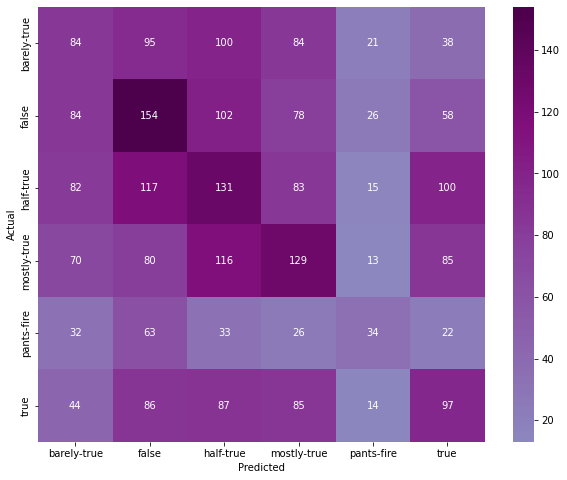

In [ ]:
from sklearn.preprocessing import Binarizer

model = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='word',preprocessor=preprocess,tokenizer=Tokenizer,stop_words=stopwords_list)),
    ('norm', Binarizer()),
    ('clf', LogisticRegression(solver='liblinear', random_state=0)),
])

model.fit(x_train, y_train)
predictions = model.predict(x_test)
print_scores()

confusion_matrix_heatmap(confusion_matrix(y_test,predictions), model.classes_)

## MultiNominal NB

Accuracy:  0.24065420560747663
              precision    recall  f1-score   support

 barely-true       0.21      0.19      0.20       422
       false       0.26      0.28      0.27       502
   half-true       0.23      0.33      0.27       528
 mostly-true       0.27      0.30      0.28       493
  pants-fire       0.29      0.06      0.10       210
        true       0.22      0.16      0.18       413

    accuracy                           0.24      2568
   macro avg       0.25      0.22      0.22      2568
weighted avg       0.24      0.24      0.23      2568

[[ 81  85 131  88   8  29]
 [ 86 141 145  74   8  48]
 [ 69 107 172 110   5  65]
 [ 60  59 152 147   2  73]
 [ 43  67  38  35  12  15]
 [ 41  82 125  93   7  65]]


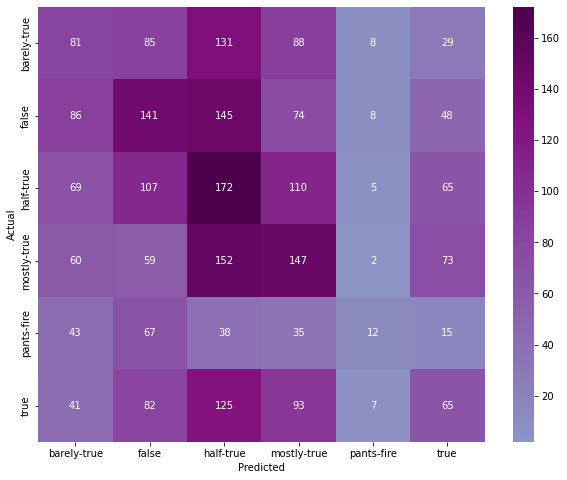

In [ ]:
# Using Multinomial Naive Bayes classifier
model.set_params(clf=MultinomialNB())

model.fit(x_train, y_train)
predictions = model.predict(x_test)
print_scores()

confusion_matrix_heatmap(confusion_matrix(y_test,predictions), model.classes_)

## XG Boost 

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:00:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.23909657320872274
              precision    recall  f1-score   support

 barely-true       0.22      0.13      0.17       422
       false       0.24      0.43      0.31       502
   half-true       0.21      0.27      0.24       528
 mostly-true       0.29      0.28      0.28       493
  pants-fire       0.32      0.06      0.10       210
        true       0.22      0.12      0.16       413

    accuracy                           0.24      2568
   macro avg       0.25      0.22      0.21      2568
weighted avg       0.24      0.24      0.22      2568

[[ 56 137 123  70  10  26]
 [ 62 218 119  61   6  36]
 [ 46 181 141 102   5  53]
 [ 30 128 138 137   3  57]
 [ 28 1

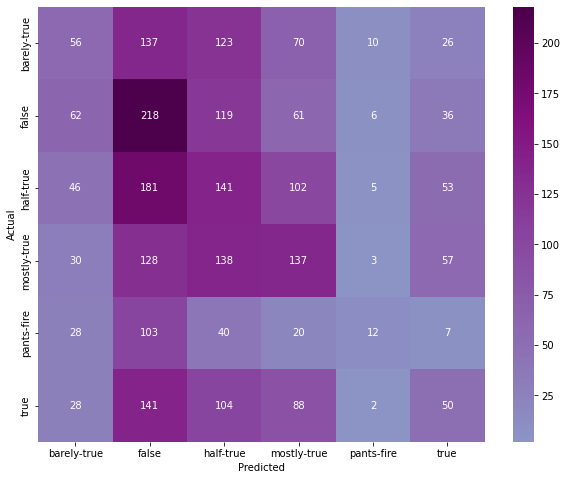

In [ ]:
# fitting X-gradient boost algorithm
model.set_params(clf=XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1, random_state=0))
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print_scores()

confusion_matrix_heatmap(confusion_matrix(y_test,predictions), model.classes_)

## Passive Aggressive Classifier 

Accuracy:  0.22429906542056074
              precision    recall  f1-score   support

 barely-true       0.20      0.20      0.20       422
       false       0.25      0.26      0.26       502
   half-true       0.23      0.26      0.25       528
 mostly-true       0.23      0.19      0.21       493
  pants-fire       0.21      0.19      0.20       210
        true       0.20      0.21      0.21       413

    accuracy                           0.22      2568
   macro avg       0.22      0.22      0.22      2568
weighted avg       0.22      0.22      0.22      2568

[[ 85  86  81  77  34  59]
 [ 96 132 105  59  43  67]
 [ 92 102 137  69  30  98]
 [ 69  84 131  95  22  92]
 [ 31  42  37  36  40  24]
 [ 50  82  94  78  22  87]]


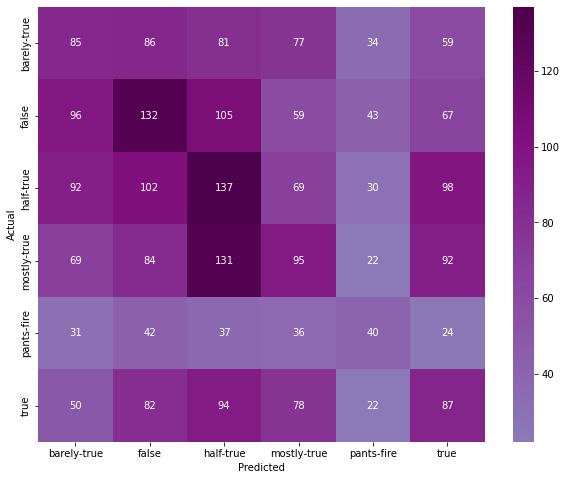

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

# fitting passive aggressive classifier algorithm
model.set_params(clf=PassiveAggressiveClassifier())
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print_scores()

confusion_matrix_heatmap(confusion_matrix(y_test,predictions), model.classes_)

# Cross validating the best models

In [ ]:
# for Logistic Regression
model.set_params(clf= LogisticRegression(solver='liblinear', random_state=0))

cv_scores = cross_validate(model, x, y,
                           cv=StratifiedKFold(n_splits=5,shuffle=False, random_state= None), 
                           return_train_score=False, 
                           scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
                          )


print_cv_scores_summary("Accuracy", cv_scores['test_accuracy'])
print_cv_scores_summary("Precision", cv_scores['test_precision_weighted'])
print_cv_scores_summary("Recall", cv_scores['test_recall_weighted'])
print_cv_scores_summary("F1", cv_scores['test_f1_weighted'])

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'arent', 'becaus', 'befor', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'dure', 'ha', 'hadnt', 'hasnt', 'havent', 'hi', 'isnt', 'mightnt', 'mustnt', 'neednt', 'onc', 'onli', 'ourselv', 'shant', 'shouldnt', 'shouldv', 'thatll', 'themselv', 'thi', 'veri', 'wa', 'wasnt', 'werent', 'whi', 'wont', 'wouldnt', 'youd', 'youll', 'yourselv', 'youv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'arent', 'becaus', 'befor', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'dure', 'ha', 'hadnt', 'hasnt', 'havent', 'hi', 'isnt', 'mightnt', 'mus

Accuracy: mean = 24.04%, sd = 0.77%, min = 22.52, max = 24.58
Precision: mean = 24.04%, sd = 0.80%, min = 22.48, max = 24.69
Recall: mean = 24.04%, sd = 0.77%, min = 22.52, max = 24.58
F1: mean = 23.86%, sd = 0.79%, min = 22.30, max = 24.46


In [ ]:
# for MultinominalNB

model.set_params(clf=MultinomialNB())

cv_scores = cross_validate(model, x, y, 
                           cv=StratifiedKFold(n_splits=5, shuffle=False, random_state= None), 
                           return_train_score=False, 
                           scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
                          )

print_cv_scores_summary("Accuracy", cv_scores['test_accuracy'])
print_cv_scores_summary("Precision", cv_scores['test_precision_weighted'])
print_cv_scores_summary("Recall", cv_scores['test_recall_weighted'])
print_cv_scores_summary("F1", cv_scores['test_f1_weighted'])

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'arent', 'becaus', 'befor', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'dure', 'ha', 'hadnt', 'hasnt', 'havent', 'hi', 'isnt', 'mightnt', 'mustnt', 'neednt', 'onc', 'onli', 'ourselv', 'shant', 'shouldnt', 'shouldv', 'thatll', 'themselv', 'thi', 'veri', 'wa', 'wasnt', 'werent', 'whi', 'wont', 'wouldnt', 'youd', 'youll', 'yourselv', 'youv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'arent', 'becaus', 'befor', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'dure', 'ha', 'hadnt', 'hasnt', 'havent', 'hi', 'isnt', 'mightnt', 'mus

Accuracy: mean = 24.48%, sd = 1.27%, min = 22.20, max = 25.98
Precision: mean = 24.84%, sd = 1.44%, min = 22.58, max = 26.61
Recall: mean = 24.48%, sd = 1.27%, min = 22.20, max = 25.98
F1: mean = 23.58%, sd = 1.24%, min = 21.36, max = 24.89


In [ ]:
# for Passive Aggressive Classifier

model.set_params(clf=PassiveAggressiveClassifier())

cv_scores = cross_validate(model, x, y, 
                           cv=StratifiedKFold(n_splits=5, shuffle=False, random_state= None), 
                           return_train_score=False, 
                           scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
                          )

print_cv_scores_summary("Accuracy", cv_scores['test_accuracy'])
print_cv_scores_summary("Precision", cv_scores['test_precision_weighted'])
print_cv_scores_summary("Recall", cv_scores['test_recall_weighted'])
print_cv_scores_summary("F1", cv_scores['test_f1_weighted'])

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'arent', 'becaus', 'befor', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'dure', 'ha', 'hadnt', 'hasnt', 'havent', 'hi', 'isnt', 'mightnt', 'mustnt', 'neednt', 'onc', 'onli', 'ourselv', 'shant', 'shouldnt', 'shouldv', 'thatll', 'themselv', 'thi', 'veri', 'wa', 'wasnt', 'werent', 'whi', 'wont', 'wouldnt', 'youd', 'youll', 'yourselv', 'youv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'arent', 'becaus', 'befor', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'dure', 'ha', 'hadnt', 'hasnt', 'havent', 'hi', 'isnt', 'mightnt', 'mus

Accuracy: mean = 22.03%, sd = 0.73%, min = 21.08, max = 23.14
Precision: mean = 22.02%, sd = 0.78%, min = 20.95, max = 23.23
Recall: mean = 22.03%, sd = 0.73%, min = 21.08, max = 23.14
F1: mean = 22.00%, sd = 0.77%, min = 20.96, max = 23.16


# Manual Testing

In [ ]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

In [ ]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


PassiveAggressiveClassifier(max_iter=50)

In [ ]:
y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 20.56%


In [ ]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [ ]:
fake_news_det("Says that U.S. Rep. Allen West")

['barely-true']


In [ ]:
fake_news_det("Over the past two years, Florida has cut more")

['half-true']


In [ ]:
fake_news_det("The United States has the highest corporate tax rate in the free world.")

['mostly-true']


In [ ]:
import pickle
pickle.dump(classifier,open('FND1model.pkl', 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open('FND1model.pkl', 'rb'))

In [ ]:
def fake_news_det1(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)

In [ ]:
fake_news_det1("Says one out of three U.S. homeless men is a veteran.")

['barely-true']


In [ ]:
fake_news_det1("I think it is unacceptable for the Chinese today to be larger in wind power and in solar panels and photovoltaic manufacturing than all of Europe put together -- forget the United States.")

['half-true']
